<a href="https://colab.research.google.com/github/Junaidjkhan/Junaid-Khan/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset -
df = pd.read_csv('aerofit_treadmill.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.shape

(180, 9)

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# Number of unique values in each row -

for i in df.columns:
  print(i, ':', df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


Based on the above observation, we can conclude that only Income, Miles, and Age should be treated as continuous variables, while the remaining columns, despite being integers or floats, should be considered categorical.

In [8]:
# Checking for null values -
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


The dataset does not contain any missing values.

## Examining the value counts for the categorical columns.

In [9]:
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [10]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [11]:
df['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [12]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [13]:
df['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [14]:
df['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [15]:
# Taking a broader look at the correlation between the columns of the dataframe by creating a copy of the dataframe.

# Convert categorical columns to numerical using label encoding
df_copy = df.copy()

# Encoding categorical variables as numerical values and explicitly casting to int
df_copy['Gender'] = df_copy['Gender'].map({'Male': 1, 'Female': 0})
df_copy['MaritalStatus'] = df_copy['MaritalStatus'].map({'Single': 0, 'Partnered': 1})
df_copy['Product'] = df_copy['Product'].map({'KP281': 0, 'KP481': 1, 'KP781': 2})

# Computing the correlation matrix
df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


## Key Insights from Your Correlation Matrix:

#Strong Positive Correlations

🔹**Product & Income (0.624)** → More expensive or premium products are likely purchased by higher-income individuals.

🔹**Fitness & Miles (0.786)** → The more fit a person is, the more miles they tend to travel.

🔹**Usage & Miles (0.759)** → People who use the product more also tend to travel more miles.

🔹**Fitness & Usage (0.669)** → Those who use the product more often tend to have higher fitness.

🔹**Education & Income (0.626)** → Higher education levels are associated with higher income.

## Moderate Positive Correlations

🔹**Product & Education (0.495)** → Higher education levels may lead to purchasing certain products.

**🔹Usage & Income (0.520)** → Higher-income individuals tend to use the product more.

**🔹Product & Fitness (0.595)** → Some products may be more popular among fitter individuals.

## Weak Positive Correlations

🔹**Age & Income (0.513)** → Older individuals tend to have higher income (but it’s not a perfect correlation).

🔹**Education & Fitness (0.411)** → More educated people might engage in fitness activities more.

🔹**Gender & Fitness (0.255)** → A slight correlation between gender and fitness.

## Negligible or Weak Negative Correlations

🔹**Marital Status & Fitness (-0.051)** → Married individuals might be slightly less fit.

🔹**Marital Status & Product (-0.018)** → Marital status has almost no impact on product choice.

🔹**Marital Status & Usage (-0.008)** → Marital status does not significantly affect product usage.

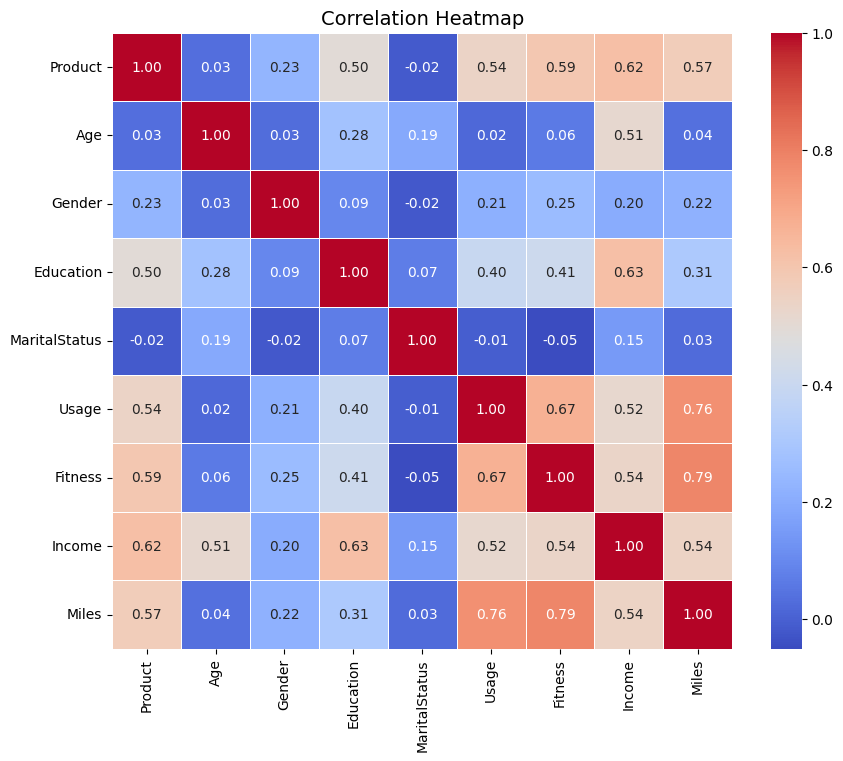

In [16]:
# Compute the correlation matrix
corr_matrix = df_copy.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


### 📌 Noteworthy Points  

- The **product/treadmill purchased** highly correlates with **Education, Income, Usage, Fitness, and Miles**.  
- **Age** is highly correlated with **Income (0.51)**, which makes sense. It also shows correlation with **Education and Marital Status**, which seems reasonable.  
- **Gender** has some correlation with **Usage, Fitness, Income, and Miles**.  
- **Education** correlates with **Age and Miles**. It is strongly correlated with **Income (as expected)** and also sufficiently correlated with **Usage and Fitness**.  
- **Marital Status** shows some correlation with **Income and Age (as expected)**.  
- **Usage** is strongly correlated with **Fitness and Miles** and has a **higher correlation with Income** as well.  
- **Fitness** has a strong correlation with **Income**.  

---

### 🔍 More Observations & Possibilities  

- **Product, Fitness, Usage, and Miles** show an **exceptionally high correlation** among themselves. This makes sense because higher usage leads to **more miles run**, which in turn **improves fitness**.  
- A reasonable pattern is that **Age and Education** (primarily) **influence Income**, which then affects **product choices**. The **more advanced the product**, the **higher its usage**, leading to **more miles run** and ultimately **better fitness**.  

> **📝 Note:** The second point is just an **observation** and **may or may not be true** since **correlation does not imply causation**.


##Examining the Outliers in Age, Income, and Miles

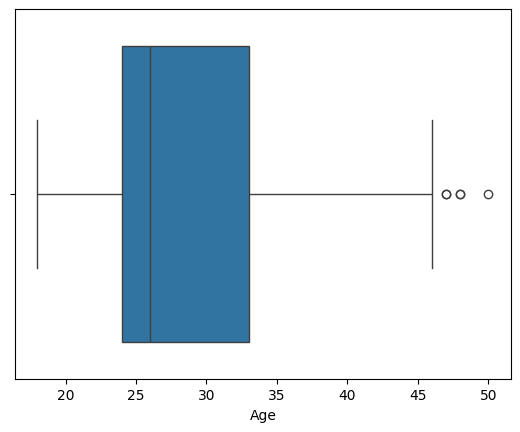

In [17]:
ax = sns.boxplot(x=df["Age"])
plt.show()

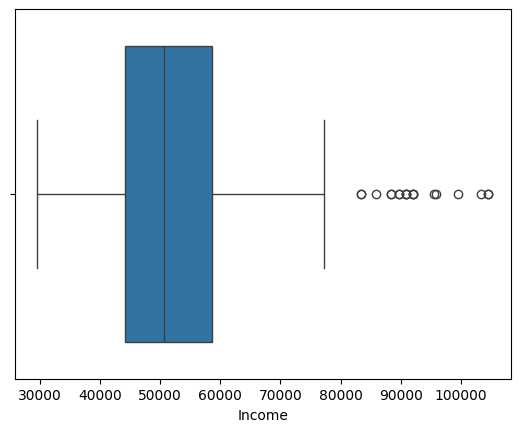

In [18]:
ax = sns.boxplot(x=df["Income"])
plt.show()

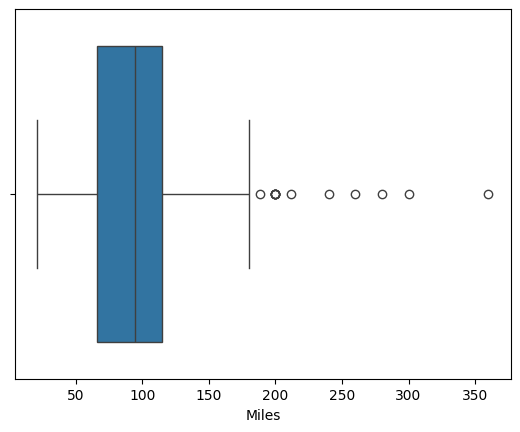

In [19]:
ax = sns.boxplot(x=df["Miles"])
plt.show()

### 📌 Handling Outliers  

There are **outliers** in our dataset. However, removing them would result in **loss of information**, especially given that our dataset is relatively **small (180 rows)**.  

Instead of removing outliers, we will **clip** the values—restricting them within the **5th and 95th percentile range** to preserve most of the data.  

> **📝 Note:** The outlier treatment is **demonstrated** in the code below using a **copy** of the dataframe. However, it is **not applied** in the final analysis since these three numerical columns (**Age, Income, and Miles**) are **binned** before further evaluation.


In [20]:
num_feat=['Age', 'Income', 'Miles']
for col in num_feat:
    percentiles = df[col].quantile([0.05,0.95]).values
    df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

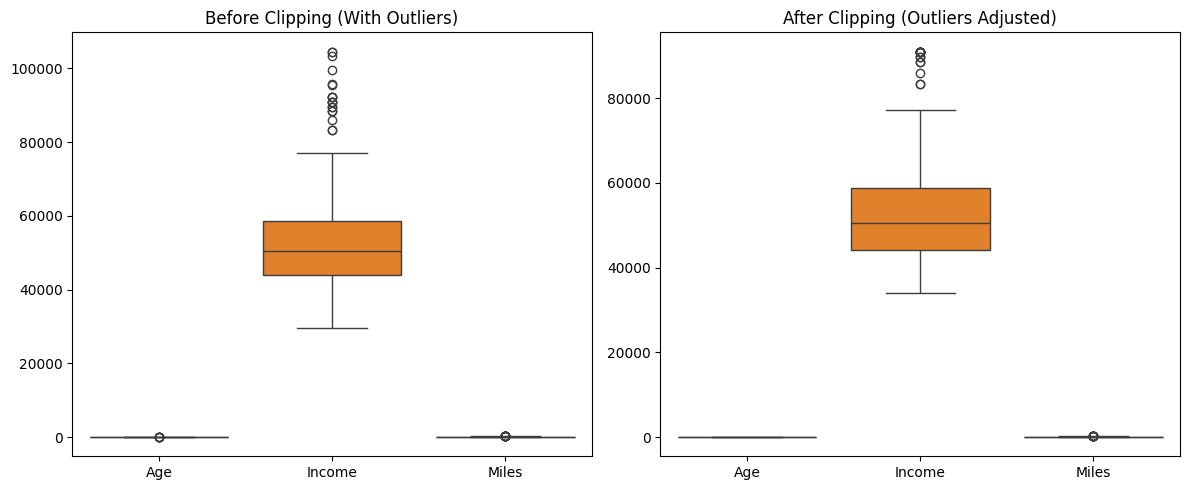

In [21]:

# Create a copy of the original dataframe
df_copy = df.copy()

# List of numerical columns to clip
num_feat = ['Age', 'Income', 'Miles']

# Plot before clipping
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[num_feat])
plt.title("Before Clipping (With Outliers)")

# Clipping outliers (5th and 95th percentile)
for col in num_feat:
    percentiles = df[col].quantile([0.05, 0.95]).values
    df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

# Plot after clipping
plt.subplot(1, 2, 2)
sns.boxplot(data=df_copy[num_feat])
plt.title("After Clipping (Outliers Adjusted)")

plt.tight_layout()
plt.show()


##Scatterplots for Examining Relationships Between Continuous Variables

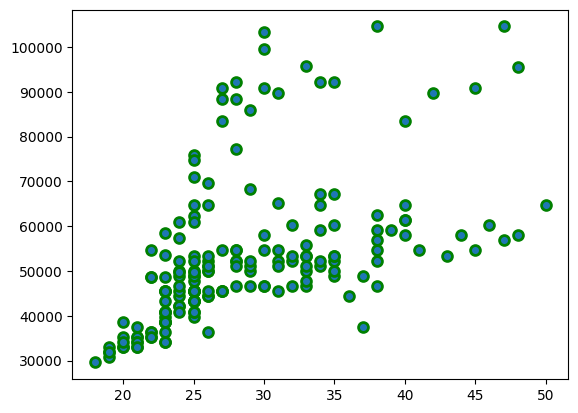

In [22]:
plt.scatter(df['Age'], df['Income'],
            linewidths=2,   # Thickness of marker edges
            marker="o",      # Shape of the marker (circle)
            edgecolor="green", # Green outline for markers
            s=50)            # Marker size
plt.show()

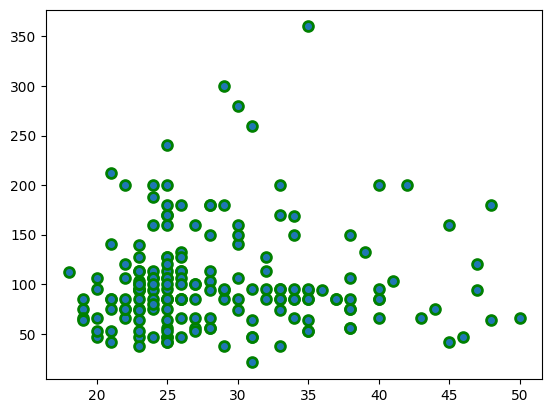

In [23]:
plt.scatter(df['Age'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="green",
            s = 50)
plt.show()

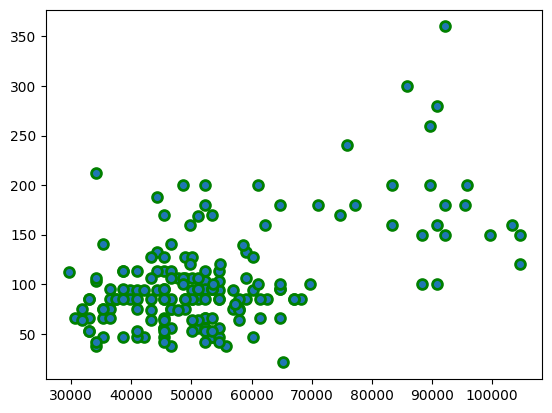

In [24]:
plt.scatter(df['Income'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="green",
            s = 50)
plt.show()

The number of miles run on the treadmill increases notably with income. In fact, only individuals with an income exceeding 70,000 have logged more than 220 miles. Additionally, there is a noticeable **heteroscedastic effect**.









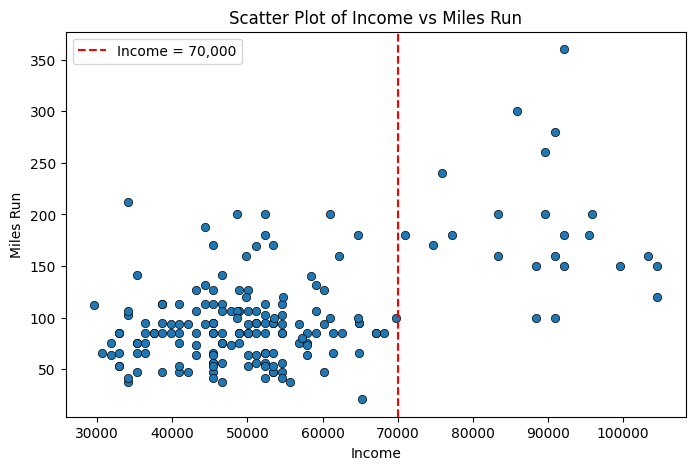

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Income'], y=df['Miles'], edgecolor="black")

plt.axvline(x=70000, color='red', linestyle='--', label='Income = 70,000')
plt.xlabel("Income")
plt.ylabel("Miles Run")
plt.title("Scatter Plot of Income vs Miles Run")
plt.legend()
plt.show()

##Examining the Relationship Between Categorical Variables and the Product

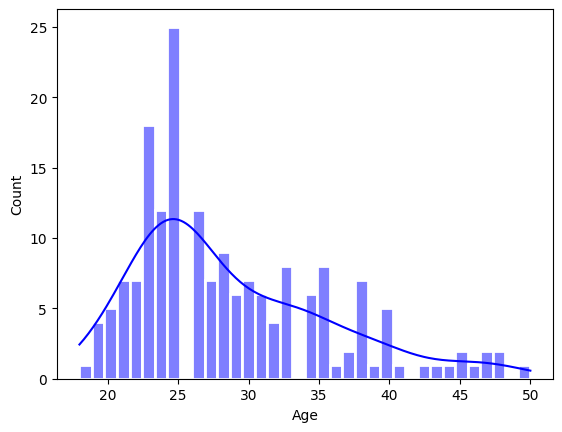

In [26]:
sns.histplot(df['Age'], bins=36, kde=True, color='blue', edgecolor='white', linewidth=2)
plt.show()

In [27]:
# Creating bins on intervals of 5 as age gaps and below 20, above 40 -

bins = [-1,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


In [28]:
df['Age_bins'].unique()

['<20', '20-25', '25-30', '30-35', '35-40', '40+']
Categories (6, object): ['<20' < '20-25' < '25-30' < '30-35' < '35-40' < '40+']

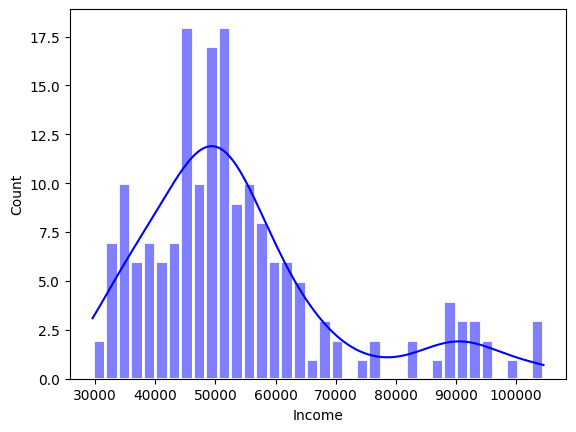

In [29]:
sns.histplot(df['Income'], bins=36, kde=True, color='blue', edgecolor='white', linewidth=2)
plt.show()

In [30]:
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [31]:
# Creating bins for income -

bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


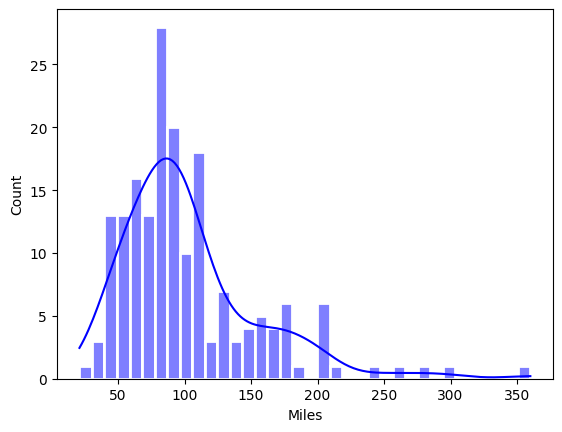

In [32]:
sns.histplot(df['Miles'], bins=36, kde=True, color='blue', edgecolor='white', linewidth=2)
plt.show()

In [33]:
df['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


In [34]:
# Creating bins for miles -

bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


In [35]:
i = 'Gender'
print(f"Proportion of different {'Gender'} buying different Treadmills")

Proportion of different Gender buying different Treadmills


In [36]:
pd.crosstab(df['Gender'], df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [37]:
pd.crosstab(df['Gender'], df['Product']).sum(axis = 1)

,0
Gender,
Female,76
Male,104


In [38]:
pd.crosstab(df['Gender'], df['Product']).div(pd.crosstab(df['Gender'],df['Product']).sum(axis=1),axis=0)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [39]:
pd.crosstab(df['Gender'], df['Product']).div(pd.crosstab(df['Gender'],df['Product']).sum(axis=1),axis=0)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [40]:
round(pd.crosstab(df['Gender'], df['Product']).div(pd.crosstab(df['Gender'],df['Product']).sum(axis=1),axis=0),2)


Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32


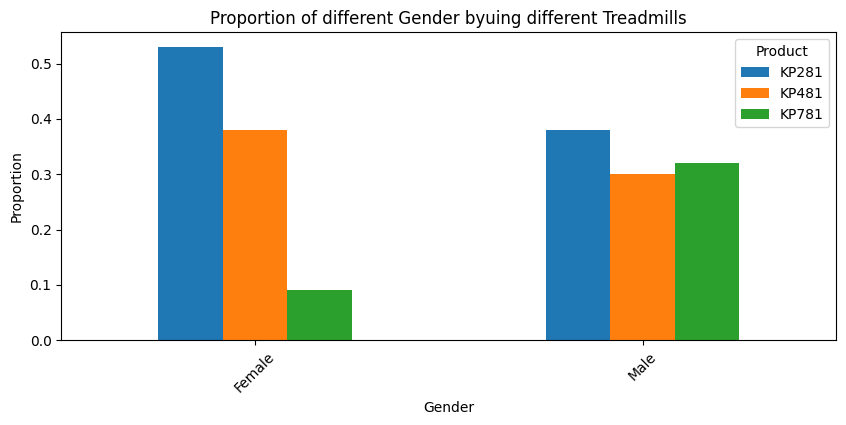

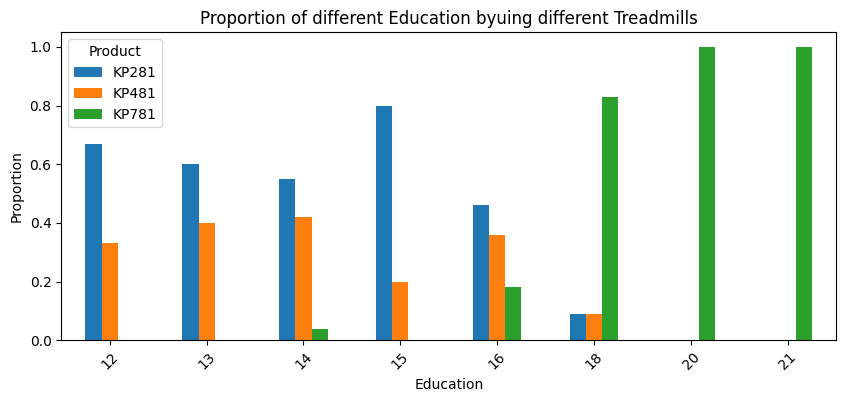

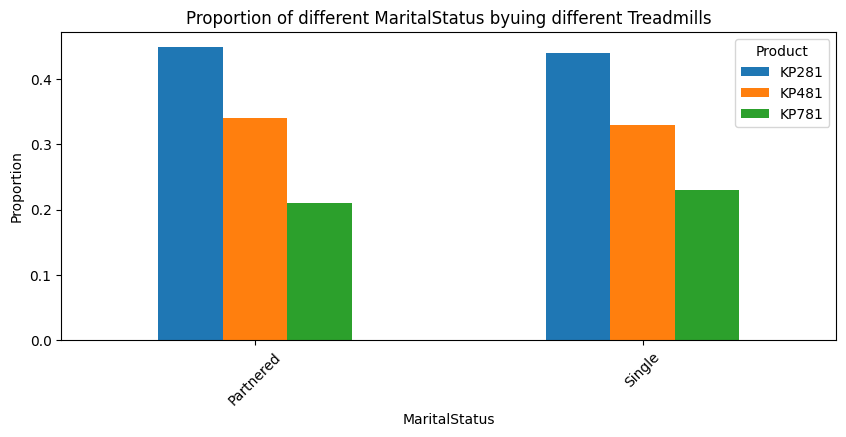

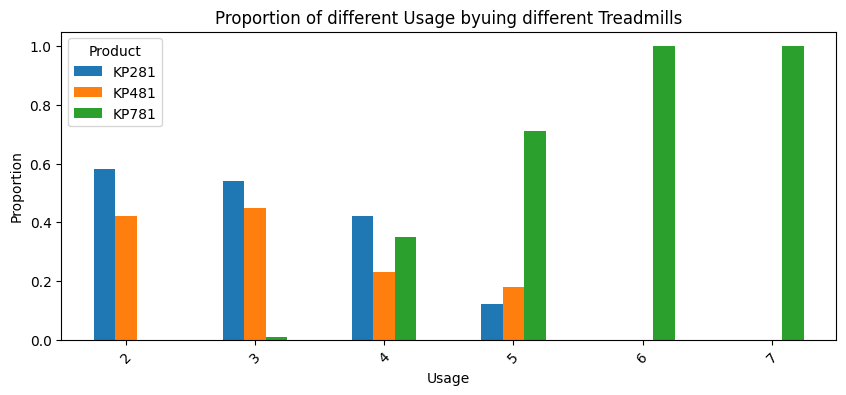

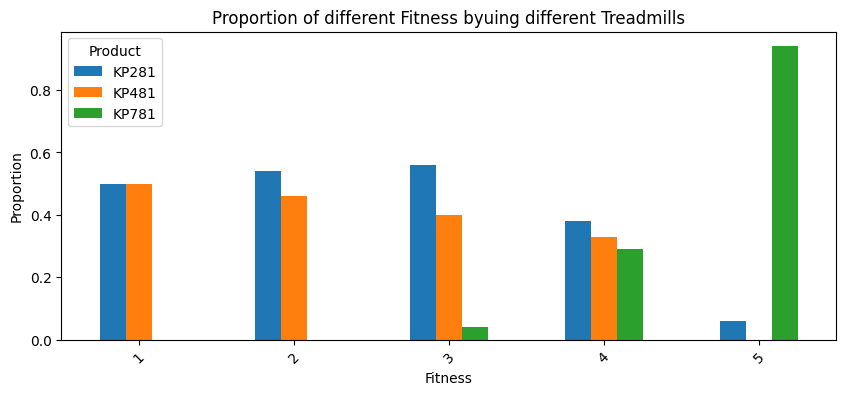

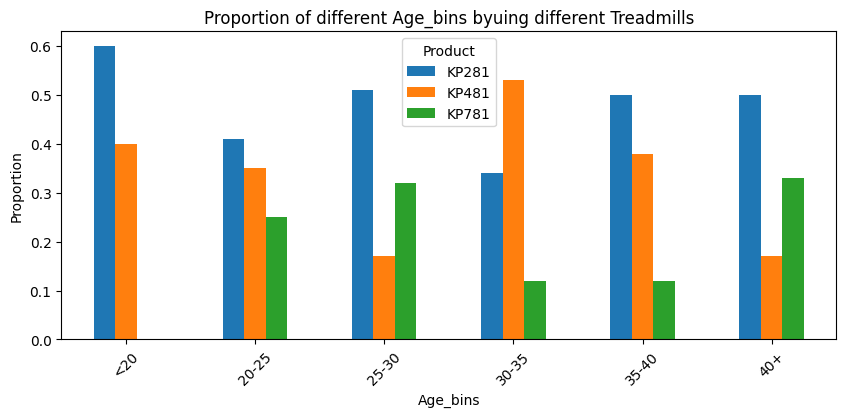

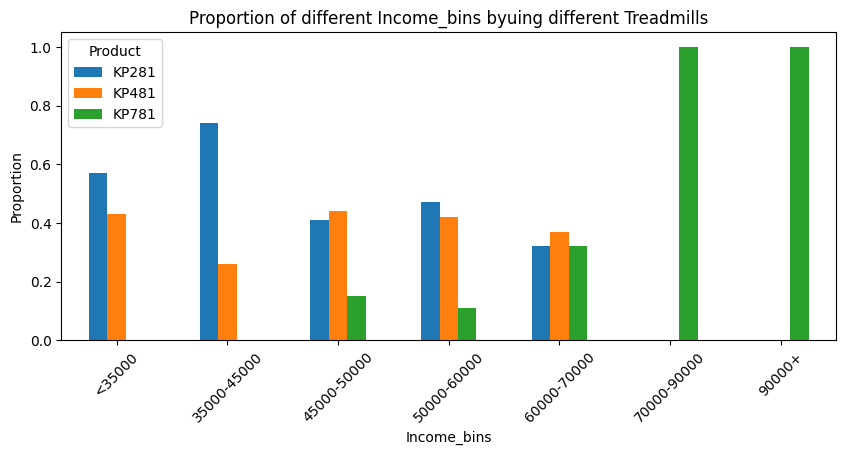

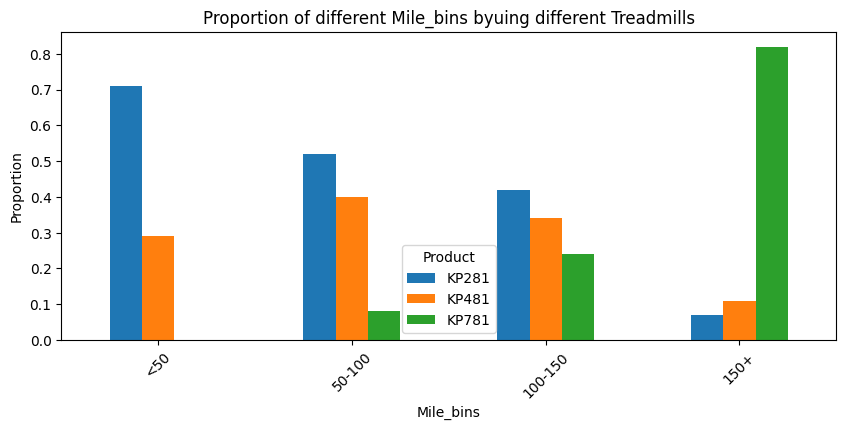

In [41]:
# Crosstabs -

cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in cat_cols:
    other= round(pd.crosstab(df[i], df['Product']).div(pd.crosstab(df[i],df['Product']).sum(axis=1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.title(f"Proportion of different {i} byuing different Treadmills")
    plt.show()

# Insights from the Categorical Plots

**Gender:**  
Around **55% of women** prefer KP281, while only **10% opt for KP781**. In contrast, approximately **35% of men** prefer KP781.  

**Education Level:**  
**80% of individuals with an education level of 18** use KP781, whereas **no one below level 14** chooses it. Additionally, **all individuals at levels 20 or 21** use KP781.  

**Marital Status:**  
There is **no significant correlation** between marital status and treadmill preference.  

**Workout Frequency:**  
Those who **exercise 6 or 7 days a week** predominantly use KP781, while **60% of individuals working out 5 days a week** also prefer KP781.  

**Fitness Level:**  
**95% of customers with a fitness level of 5** choose KP781, whereas **none with a fitness level below 3** opt for it.  

**Age:**  
No one **under 20 years old** uses KP781.  

**Income Level:**  
Individuals **earning above 70,000 units** exclusively use KP781, while **no one earning below 45,000 units** selects it.  

**Miles Run:**  
Nearly **80% of those running over 200 miles** and **a majority of those running above 150 miles** prefer KP781. Meanwhile, **no one running under 50 miles** chooses it. The preference for **KP281 declines as miles increase**, whereas **KP781 usage rises with mileage**.


##Let's deal with Probabilities -

In [42]:
# What is the probability of a male customer buying a KP781 treadmill?

from IPython.display import display
for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True, normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
70000-90000,0.000000,0.000000,1.000000
90000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Mile_bins vs Treadmill Product


Product,KP281,KP481,KP781
Mile_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


# Understanding the `normalize` Parameter in Crosstab  

The **normalize** parameter accepts boolean values and determines the percentage of time each combination occurs (i.e., the marginal probability). It works as follows:  

- **`normalize=True` or `normalize='all'`** → Normalizes over all values.  
- **`normalize='index'`** → Normalizes over each row.  
- **`normalize='columns'`** → Normalizes over each column.  
- **If `margins=True` is enabled, the margin values are also normalized.**  

---

## **Probabilities Inferred from the Above Tables**  

In all tables, the last row labeled **"All"** represents the overall probabilities of treadmill purchases:  

- **Probability of purchasing KP281** = **44.44%**  
- **Probability of purchasing KP481** = **33.33%**  
- **Probability of purchasing KP781** = **22.22%**  

### **Conditional Probabilities:**  
- **Education Level:**  
  - P(KP281 | Education = 12) = **66.66%**  
  - P(KP781 | Education = 18) = **82.6%**  
  - P(KP781 | Education = 20) = P(KP781 | Education = 21) = **100%**  

- **Usage:**  
  - P(KP281 | Usage = 2) = **57.57%**  
  - P(KP781 | Usage = 6) = P(KP781 | Usage = 7) = **100%**  

- **Fitness Level:**  
  - P(KP481 | Fitness = 2) = **46.15%**  

- **Age Group:**  
  - P(KP481 | Age_bins = 30-35) = **53.12%**  

- **Income Level:**  
  - P(KP781 | Income > 70,000) = **100%**  
  - P(KP481 | Income_bins = 45,000-50,000) = **44.11%**  

- **Miles Run:**  
  - P(KP281 | Mile_bins < 50) = **70.5%**  
  - P(KP781 | Mile_bins > 150) = **82.1%**  

---

### **Key Observations**  
So far, we have gained valuable insights into **KP781** customers. However, the **distinctions between KP281 and KP481 remain unclear**, requiring further analysis.


In [43]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


# **Multivariate Analysis Using Scatterplots and Factorplots**  

This analysis focuses on **visualizing relationships between multiple variables** to better understand the target audience for different treadmill products.  

Given that **KP281 and KP481 appear quite similar**, we use **scatterplots and factorplots** to identify distinguishing patterns and insights that help differentiate their customer base.


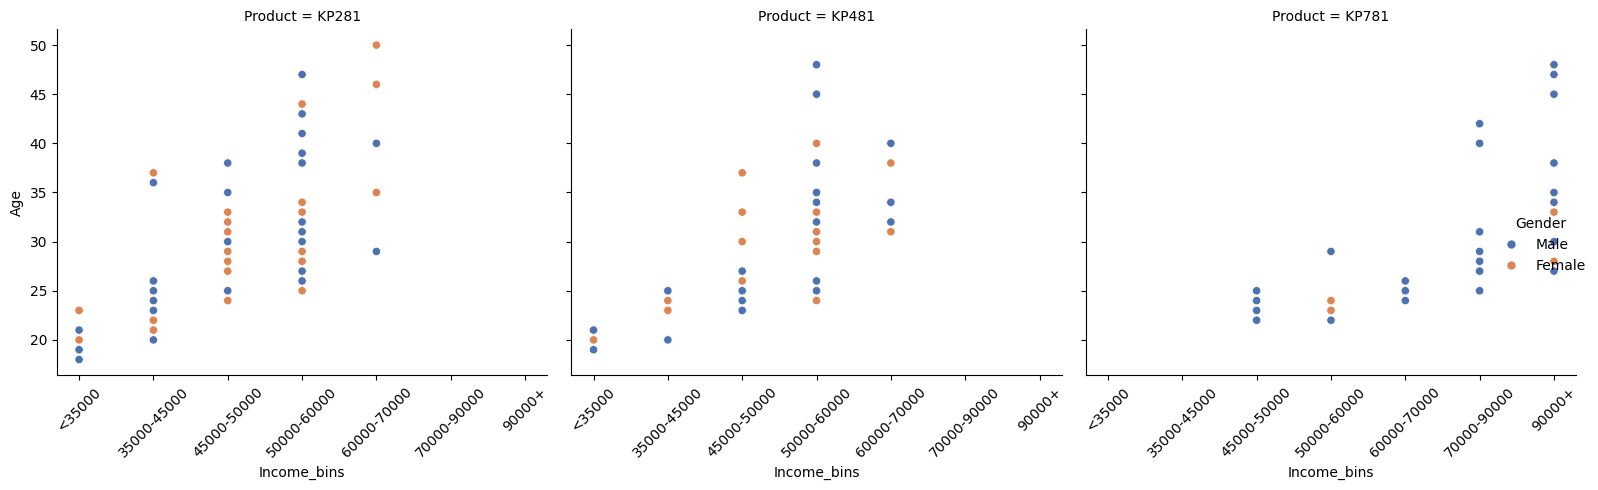

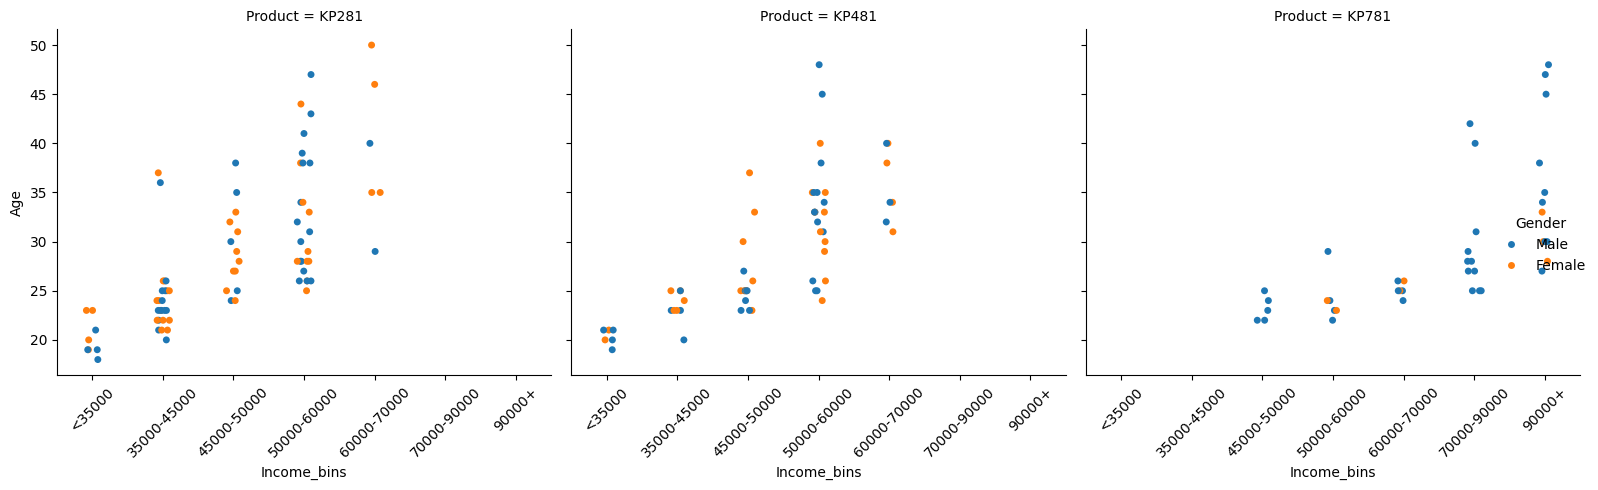

In [46]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Age',
    col='Product',
    hue='Gender',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Age',
    hue='Gender',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Insights on Women's Treadmill Preferences Based on Income and Age**

- Among women earning **below 70k**, the **average age** of those using **KP281 is 40**, whereas for **KP481, it is 35**.  
- Only **two women have incomes exceeding 70k**, which likely explains the **low adoption of KP781** among them, indicating affordability constraints.  
- Additionally, **variance in age** is higher for **KP281 users** compared to other models.  
- However, due to the **limited number of data points**, this observation requires **further validation with more data**.


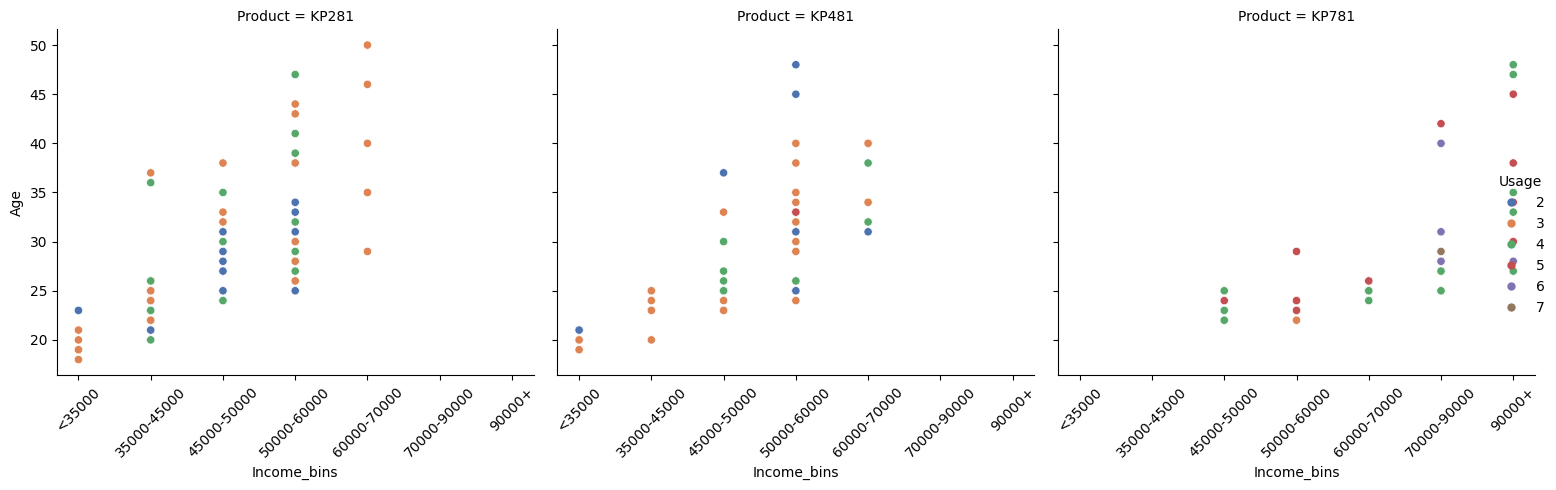

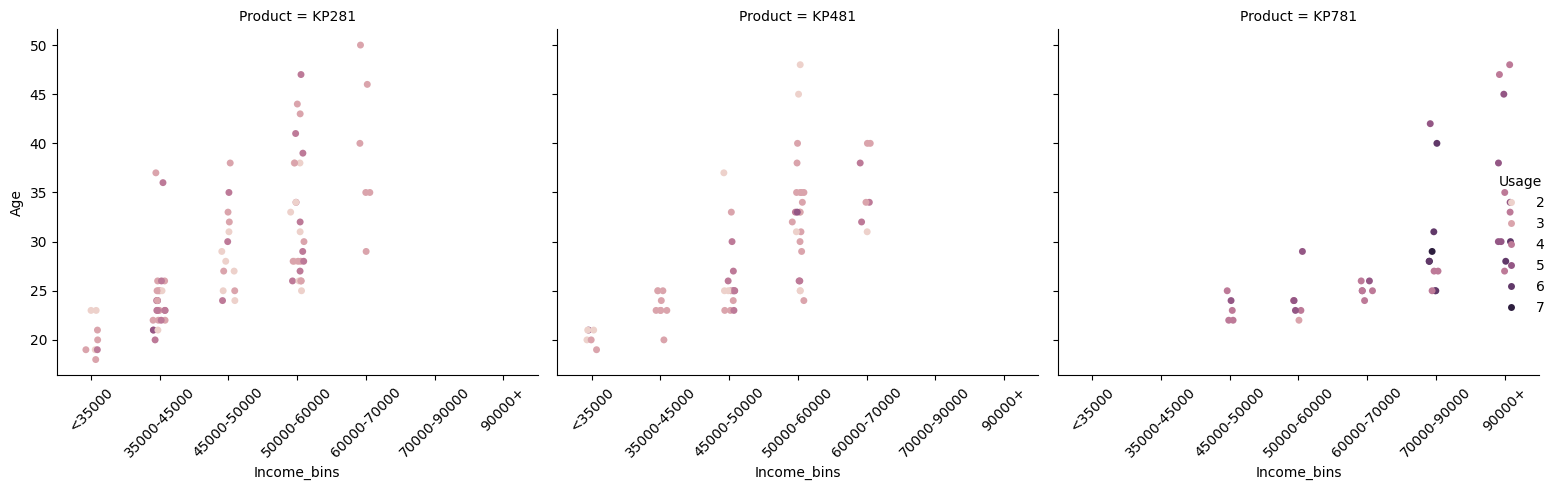

In [48]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Age',
    col='Product',
    hue='Usage',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Age',
    hue='Usage',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Purchase Likelihood of KP281 Based on Usage and Income**

- Users with **Usage = 3** and an **income between 60k-70k** are highly likely to purchase the **KP281 Treadmill**.  
- Users with **Usage = 2** and an **income between 45k-50k** are also strongly inclined towards **KP281**.  
- Similarly, those earning **45k-50k** with **Usage = 4** predominantly choose **KP281**.  
- Users in the **50k-60k income range** with **Usage = 4** are also very likely to purchase **KP281**.  

These patterns suggest a strong preference for **KP281 among specific income and usage groups**.


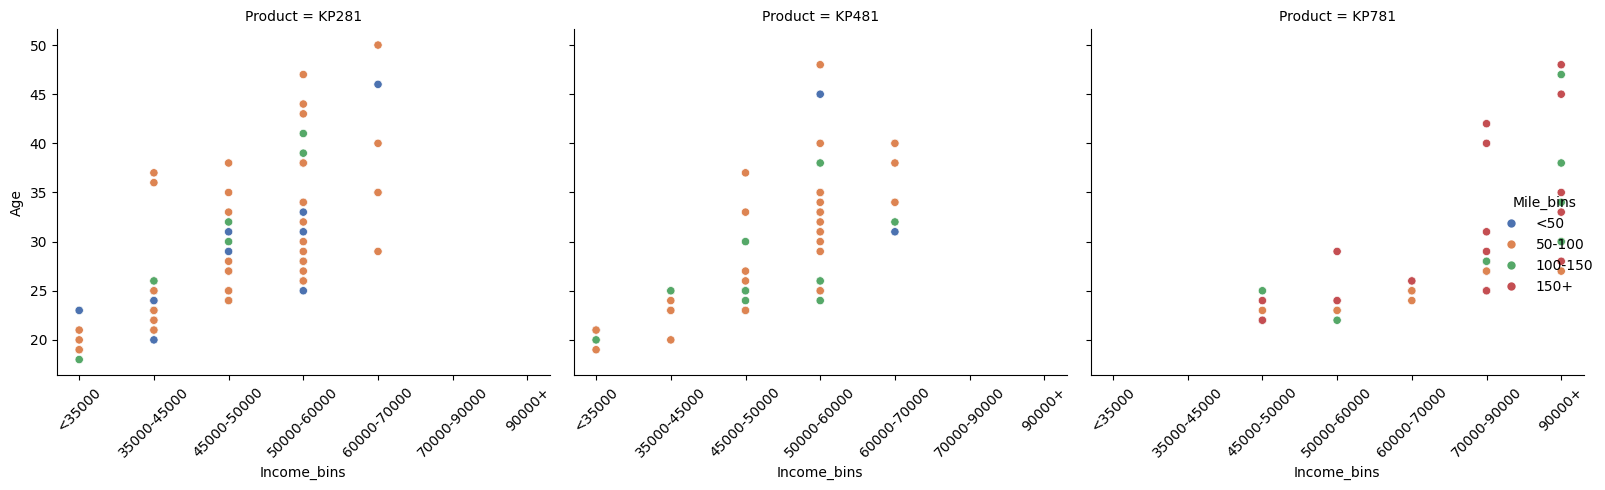

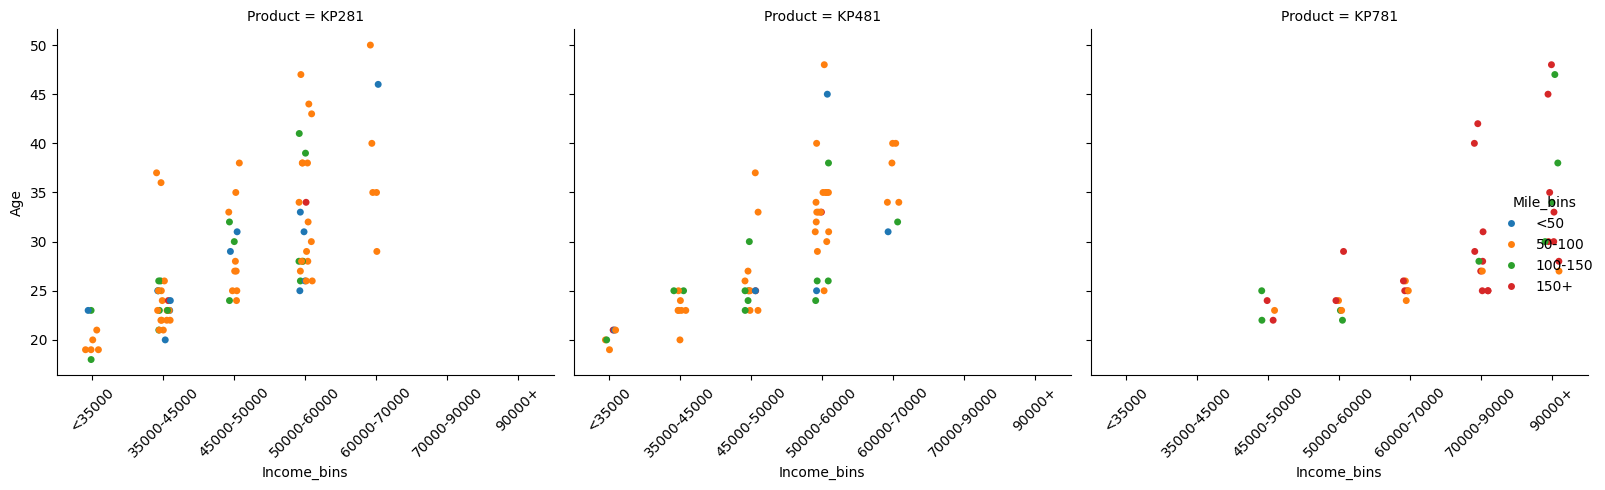

In [49]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Age',
    col='Product',
    hue='Mile_bins',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Age',
    hue='Mile_bins',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Preference for KP481 Based on Miles, Income, and Age**

Customers who **run between 100-150 miles**, have an **income between 50k-60k**, and are **aged between 25-30** tend to prefer the **KP481 Treadmill**.


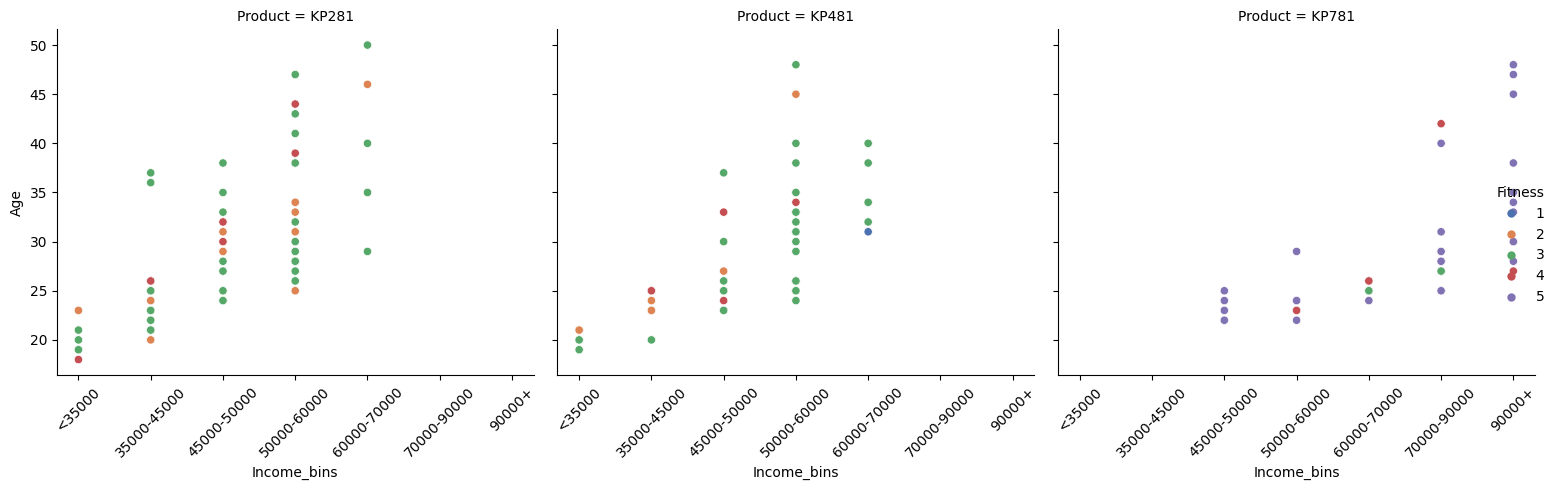

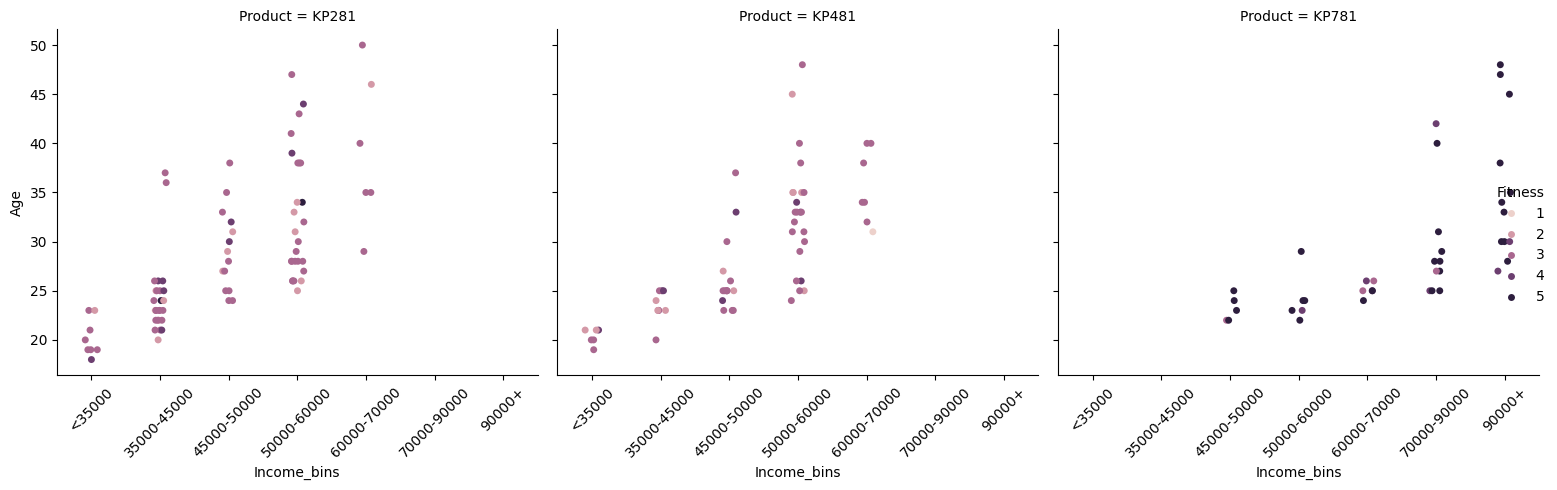

In [50]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Age',
    col='Product',
    hue='Fitness',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Age',
    hue='Fitness',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Treadmill Preferences Based on Age, Fitness Level, and Income**

- Customers **around 40 years old**, with a **fitness level of 4** and an **income between 50k-60k**, tend to prefer the **KP281 Treadmill**.  
- Customers **aged 25-32 years**, with a **fitness level of 4** and an **income between 50k-60k**, are more likely to choose the **KP481 Treadmill**.  


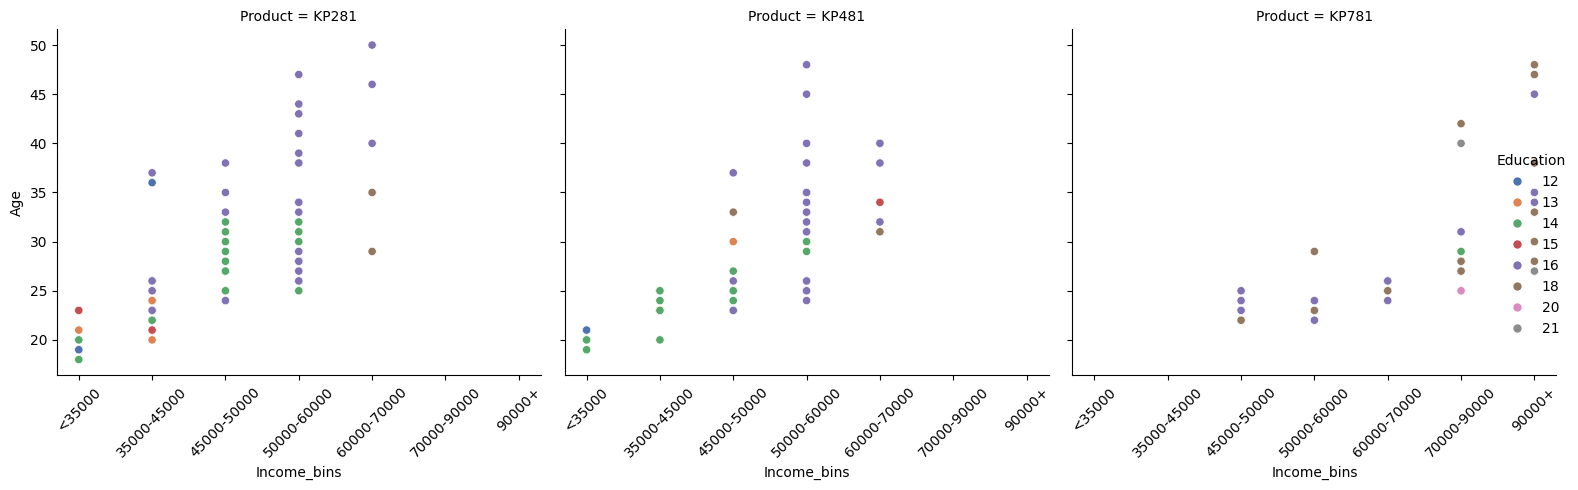

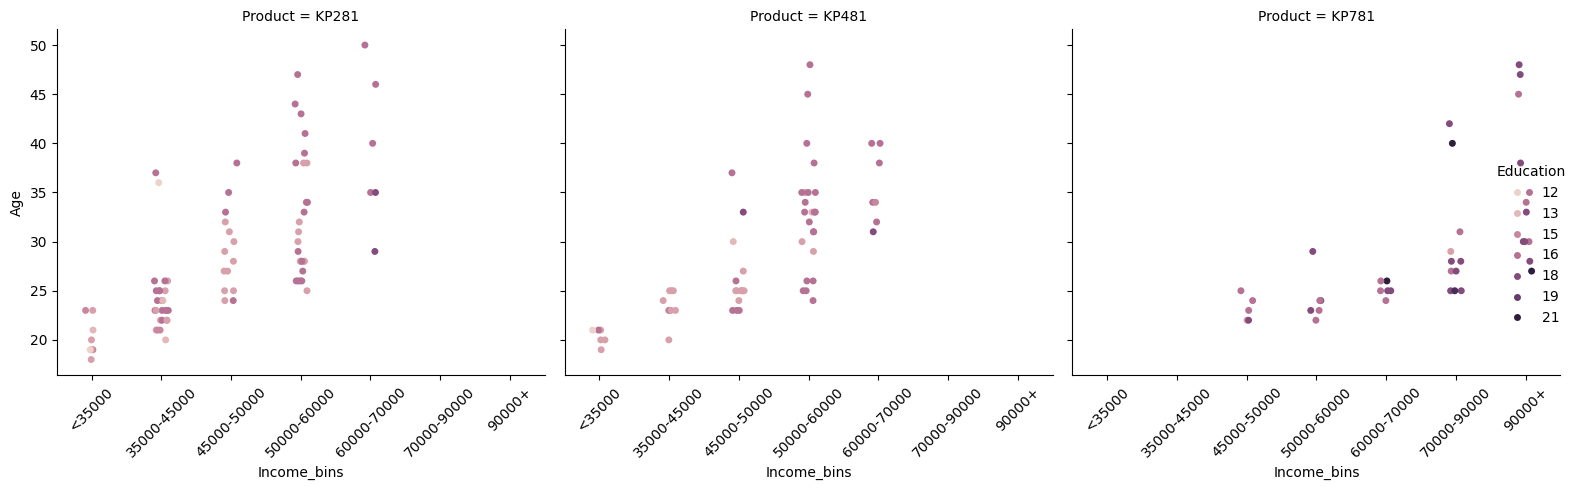

In [51]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Age',
    col='Product',
    hue='Education',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Age',
    hue='Education',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Treadmill Preferences Based on Education Level, Age, and Income**

- For customers with an **education level of 16** and an **income between 45k-50k**:  
  - Those **above 32 years of age** tend to prefer **KP281**.  
  - Those **below 22 years of age** are more likely to choose **KP481**.  

- For customers with the **same education level** but an **income between 60k-70k**:  
  - Those **above 45 years of age** tend to use **KP281**.  
  - Those **below 35 years of age** are more inclined towards **KP481**.  


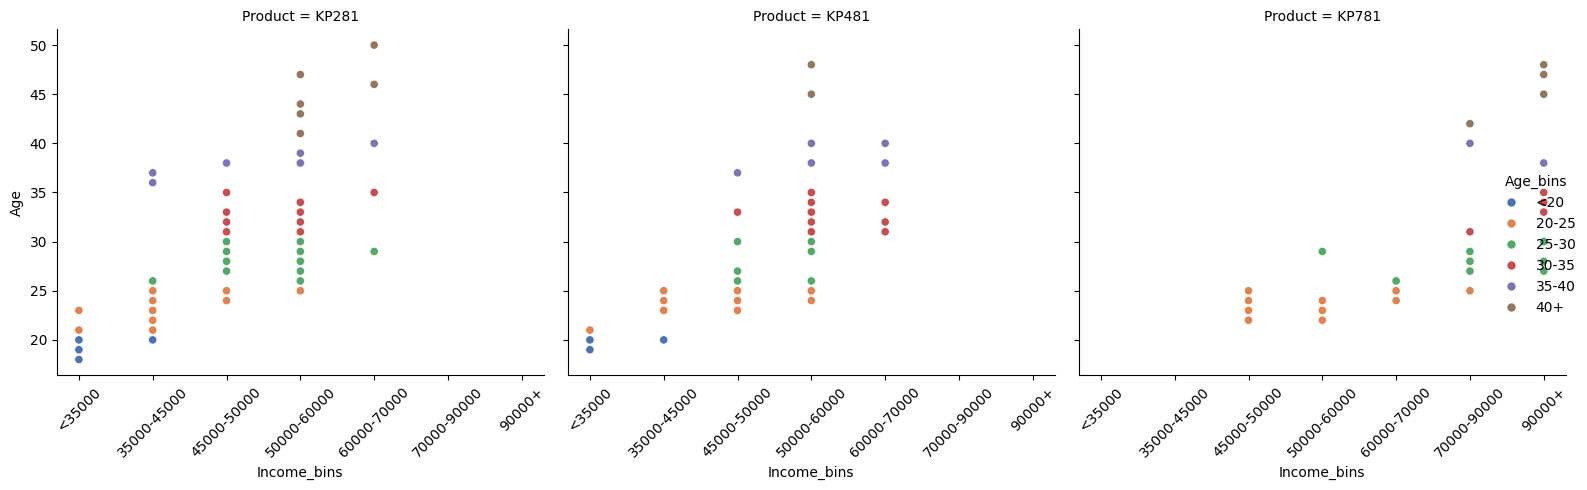

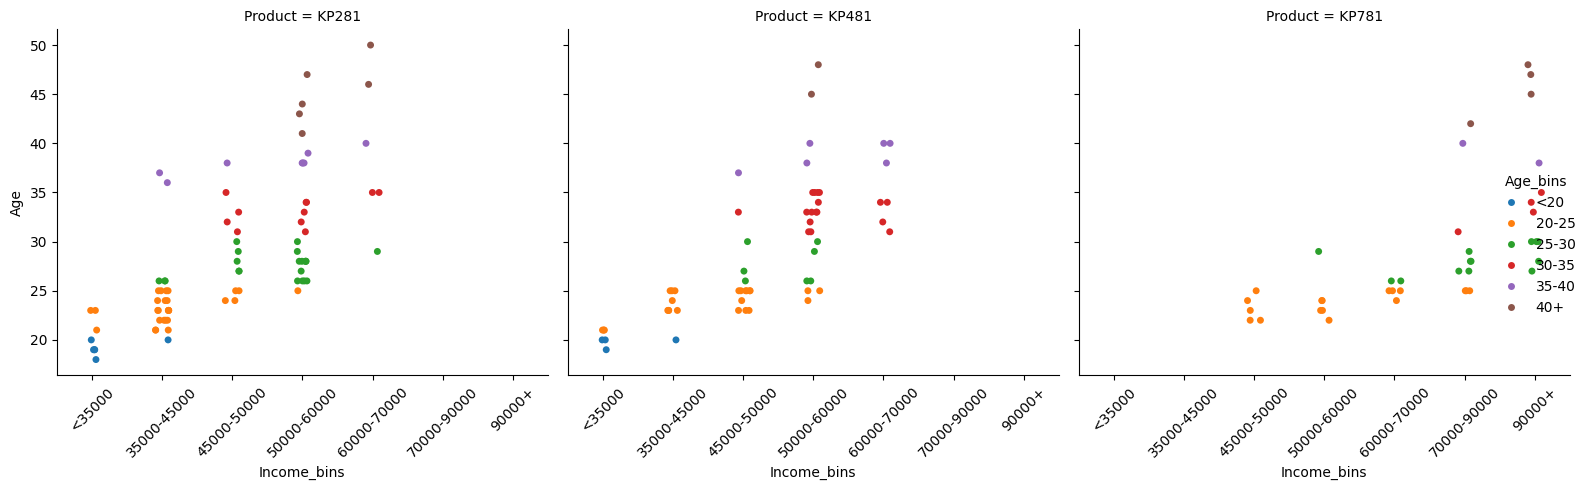

In [52]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Age',
    col='Product',
    hue='Age_bins',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Age',
    hue='Age_bins',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Treadmill Preferences Based on Age and Income**

- Individuals aged **25-30** and **35-40 years**, with an **income between 35k-45k**, tend to prefer **KP281**.  
- Those **40+ years old** with an **income between 60k-70k** are more likely to use **KP281**.  
- However, individuals in the **same income range (60k-70k)** but aged **35-40 years** tend to prefer **KP481**.  


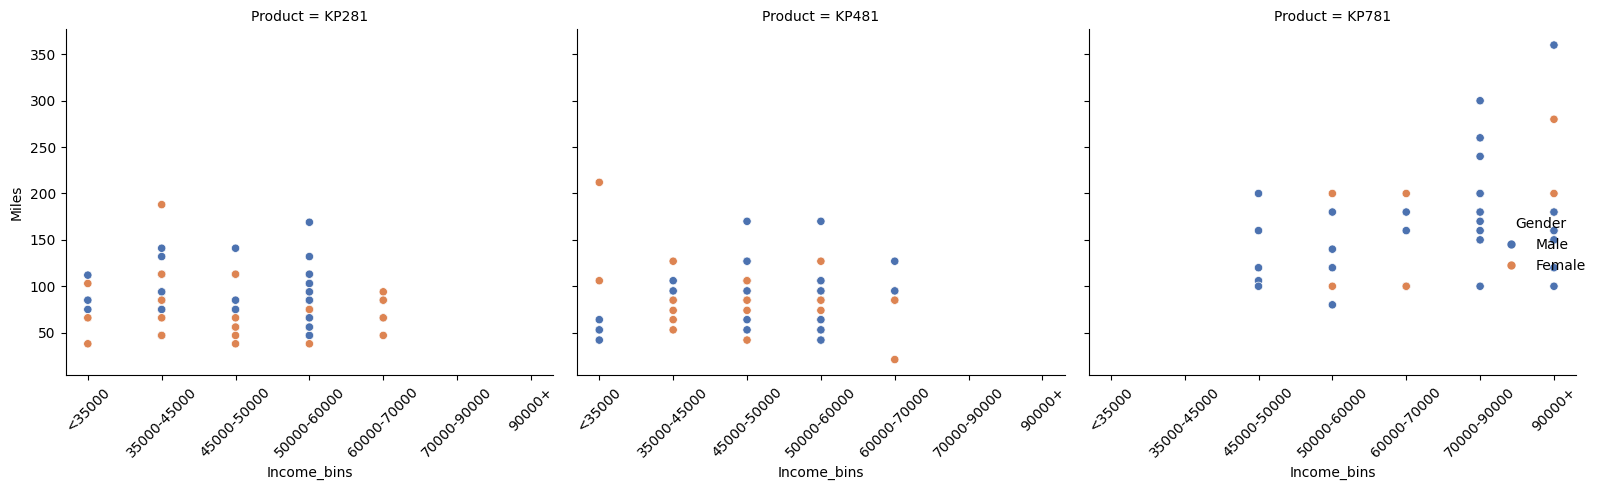

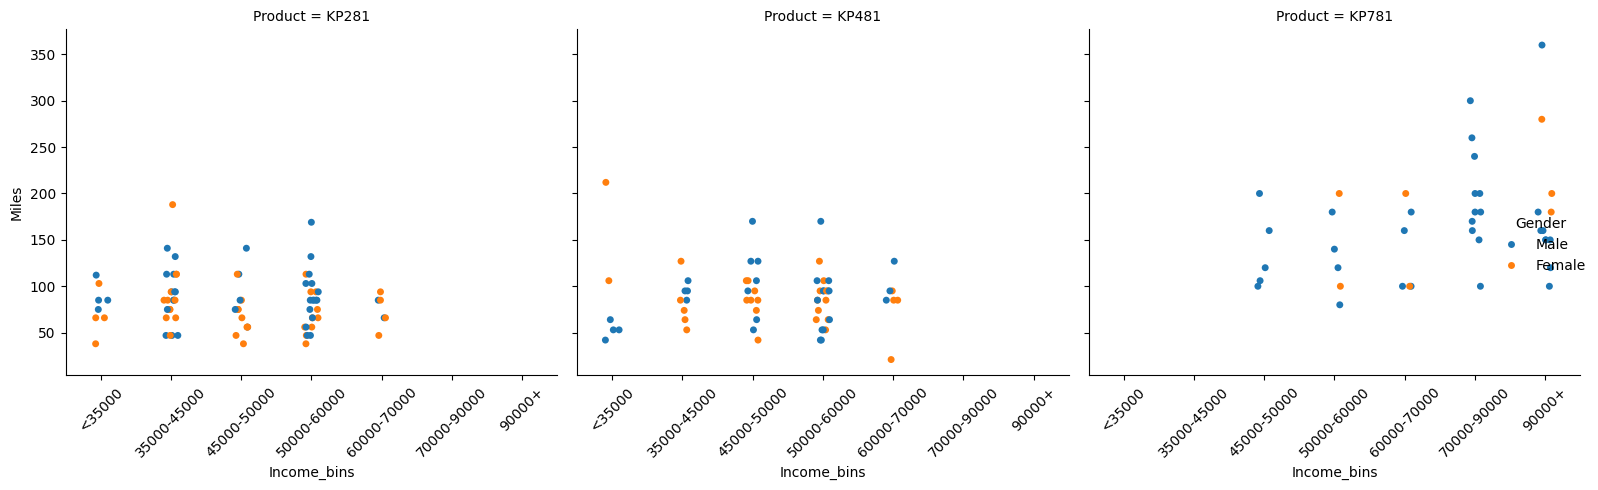

In [54]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Miles',
    col='Product',
    hue='Gender',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Miles',
    hue='Gender',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Treadmill Preferences Based on Income, Gender, and Miles Run**

- For **women with an income below 35k**:  
  - Those who **run over 105 miles** tend to prefer **KP481**.  
  - Those who **run below 105 miles** are more likely to use **KP281**.  

- For **men with an income between 60k-70k**:  
  - Those who **run between 100-150 miles** tend to prefer **KP481**.  


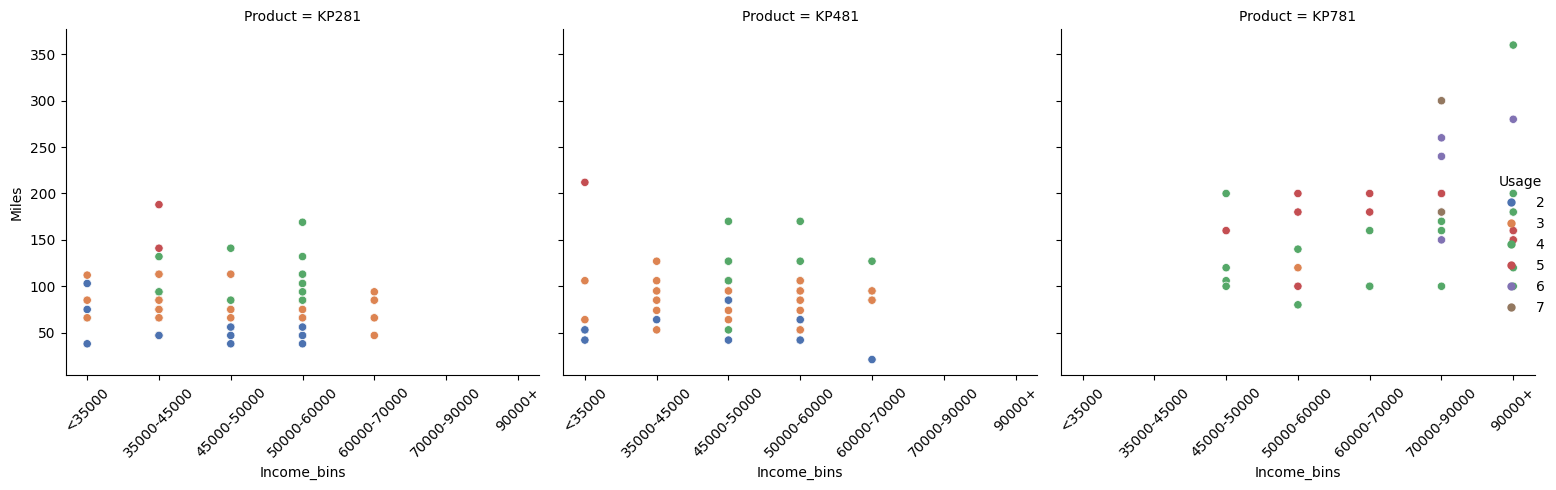

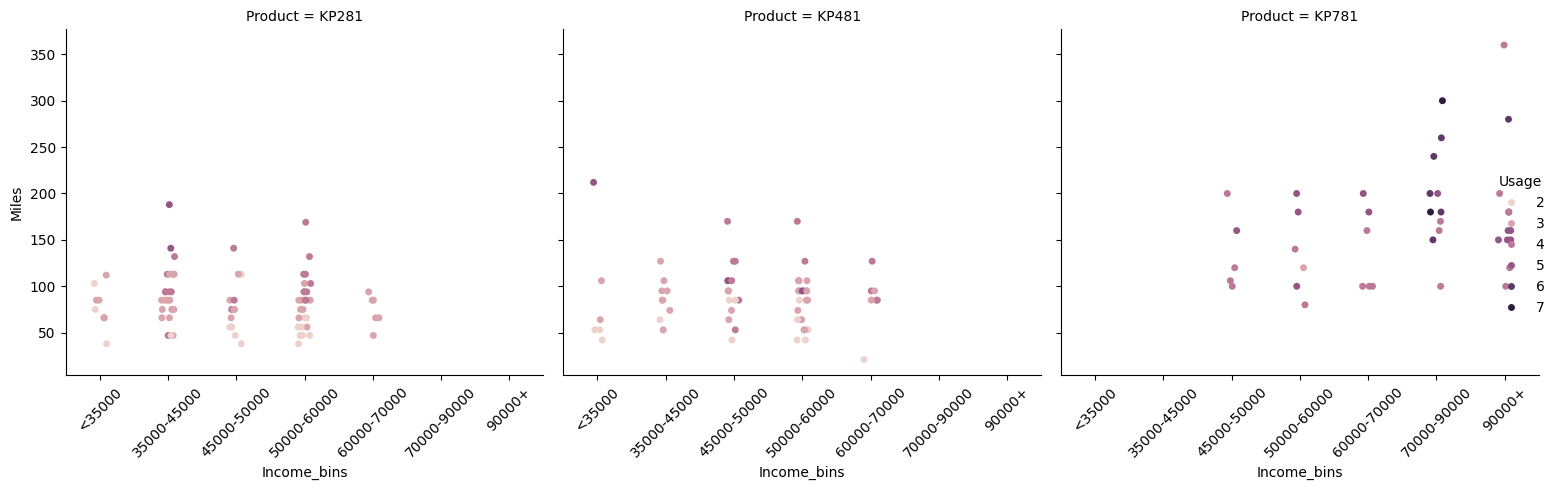

In [55]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Miles',
    col='Product',
    hue='Usage',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Miles',
    hue='Usage',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Treadmill Preference Based on Usage, Income, and Miles Run**  

- Customers who **work out 5 days a week** and have an **income between 35k-45k** tend to prefer **KP281** if they **run more than 140 miles**.  


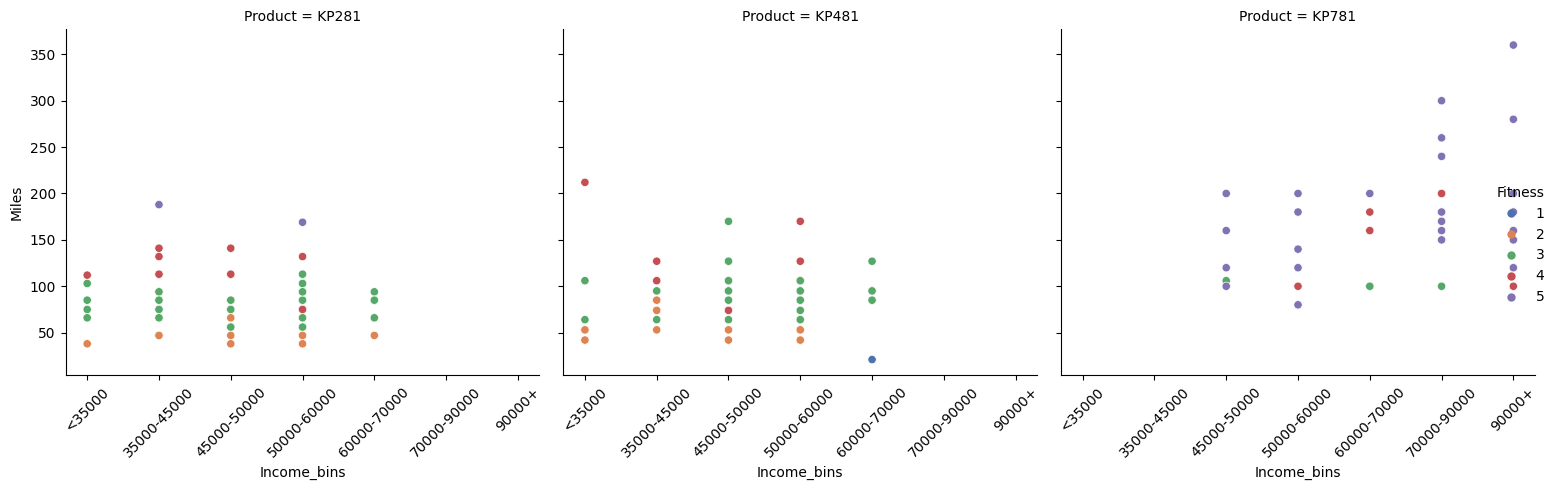

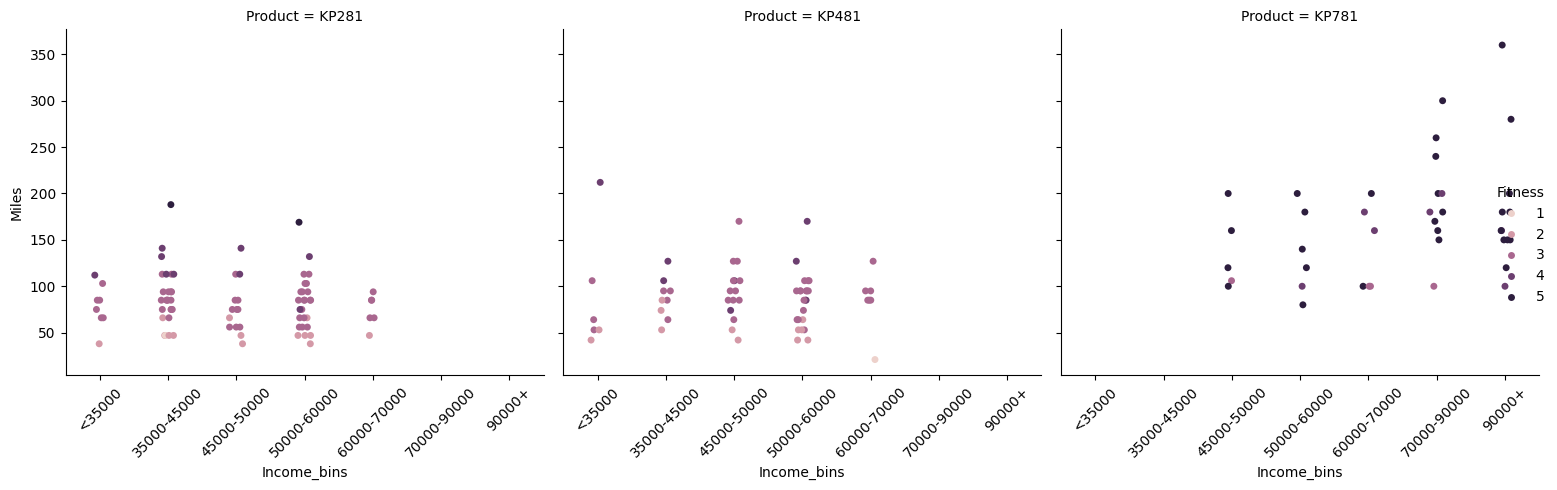

In [56]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Miles',
    col='Product',
    hue='Fitness',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Miles',
    hue='Fitness',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Treadmill Preference Based on Fitness Level, Income, and Miles Run**  

- Customers with a **fitness level of 4** and an **income between 50k-60k** tend to prefer the **KP281 Treadmill**.  
- However, within the **same fitness and income group**, if they **run more than 100 miles**, they are more likely to use the **KP481 Treadmill**.  


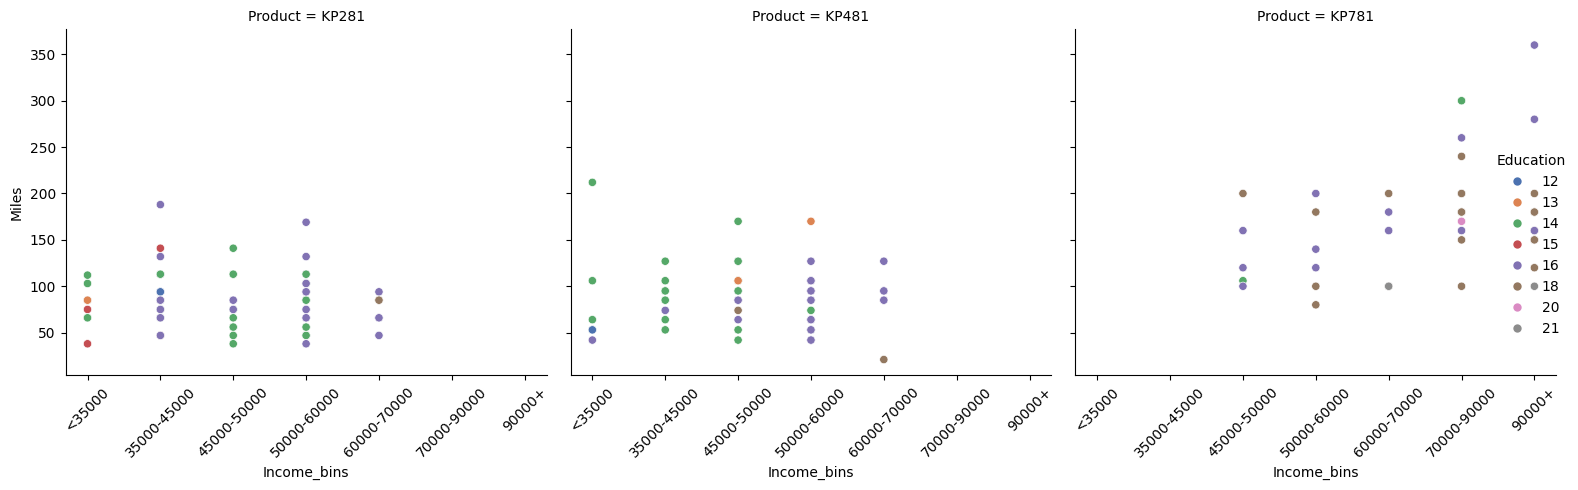

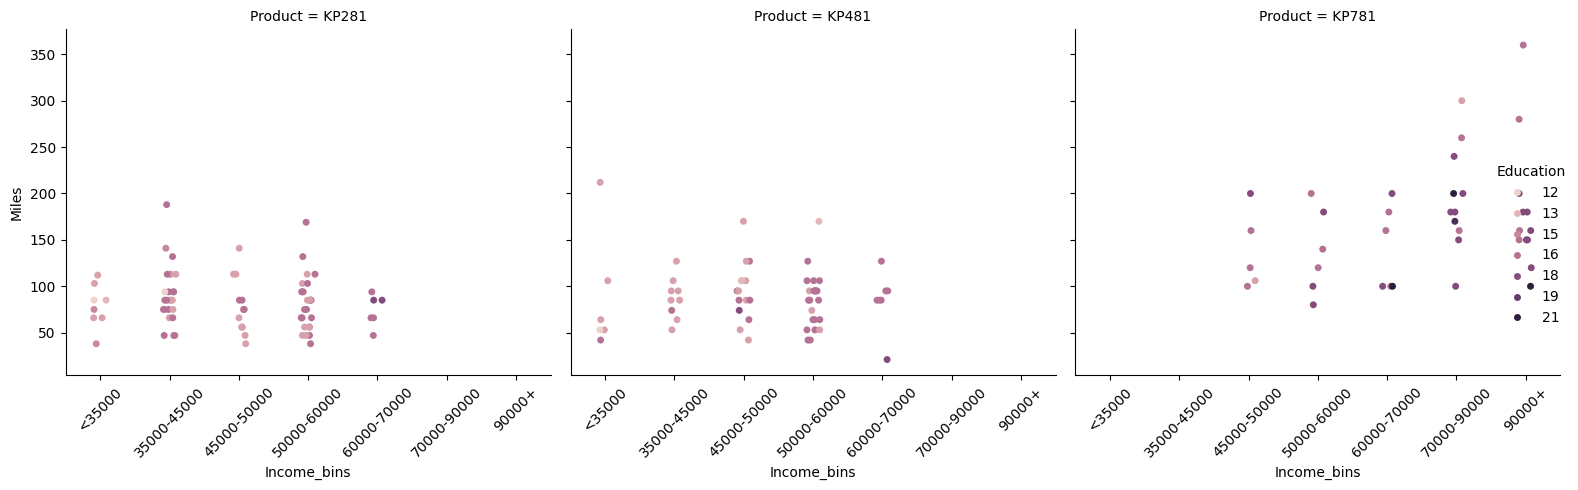

In [57]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Income_bins',
    y='Miles',
    col='Product',
    hue='Education',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Miles',
    hue='Education',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Treadmill Preference Based on Education Level and Income**  

- Customers with an **education level of 13** and an **income between 45k-60k** tend to prefer **KP481**.  
- Customers with an **education level of 15** and an **income below 35k** are more likely to use **KP281**.  


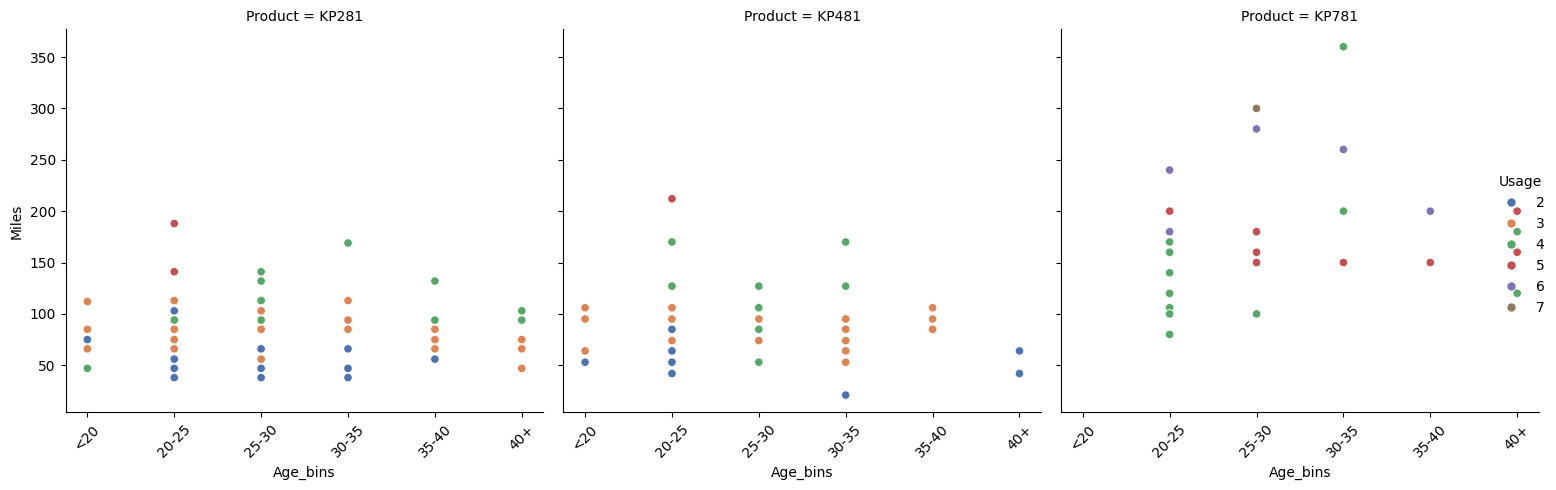

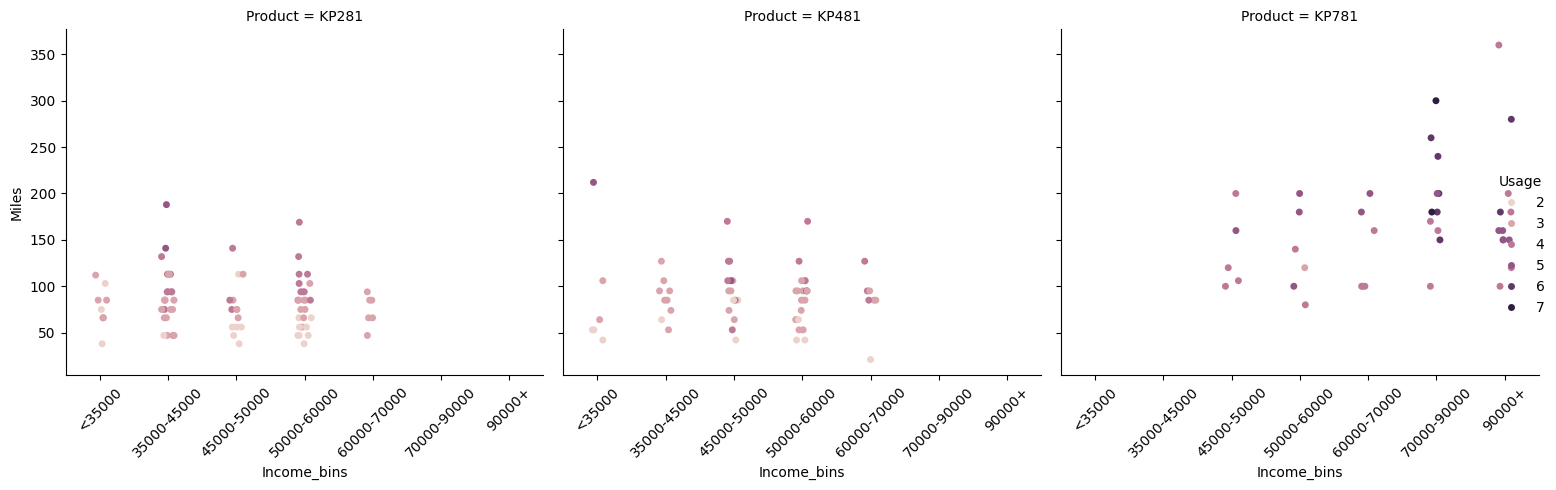

In [59]:
# Scatter plot using relplot
plot = sns.relplot(
    data=df,
    x='Age_bins',
    y='Miles',
    col='Product',
    hue='Usage',
    palette="deep",
    kind="scatter"
)

# Fixing x-tick labels
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())  # Explicitly set tick positions
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

# Factor plot (now catplot)
plot = sns.catplot(
    x='Income_bins',
    y='Miles',
    hue='Usage',
    col='Product',
    data=df,
    jitter=True  # Helps to visualize overlapping points
)

# Fixing x-tick labels again
for axes in plot.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Treadmill Usage Insights & Customer Profiling**  

## **Key Observations:**  
- **40+ age users** with **2 usage days per week** tend to use **KP481**, whereas those with **3 usage days per week** and running **less than 70 miles** prefer **KP281**.  
- **Users aged 25-30** with **2 usage days per week** are more likely to use **KP281**.  

---

## **Recommendations & Customer Profiling**  

### **Customer Profile for KP781:**  
- **Necessary condition:** **Income > 70,000**  
- **Recommend KP781** if one or more of the following conditions are met:  
  - **Education Level ≥ 18**  
  - **Usage days ≥ 5**  
  - **Fitness Level = 5**  
  - **Runs more than 150 miles** (80% of such users choose KP781)  

- **Never Recommend KP781** if any of the following conditions apply:  
  - **Education Level < 14**  
  - **Fitness Level < 3**  
  - **Age < 20**  
  - **Income < 45,000**  
  - **Miles run < 50**  

### **Why do fewer women purchase KP781?**  
- Only **two women** have **incomes over 70k**, which suggests affordability is a major factor in their **lower adoption of KP781**.  

---

## **Customer Profiles for KP281 & KP481**  
> *Note: KP281 and KP481 are similarly priced, and their users share overlapping characteristics. Further validation with additional data is required.*  

### **Customer Profile for KP281:**  
- **Women** with **incomes below 70k** and **age > 40**  
- **Customers** with:  
  - **Income 60k-70k, Usage = 3 days per week**  
  - **Income 45k-50k, Usage = 2 days per week**  
  - **Income 35k-45k, Usage = 4 days per week**  
  - **Income 50k-60k, Usage = 4 days per week**  
  - **Fitness Level = 4, Age ≈ 40, Income = 50k-60k**  
  - **Education Level = 16, Age > 32, Income = 45k-50k**  
  - **Education Level = 16, Age > 45, Income = 60k-70k**  
  - **Age 25-30 & 35-40, Income = 35k-45k**  
  - **Age 40+, Income = 60k-70k**  
  - **Women with Income < 35k, Miles run < 105**  
  - **Usage = 5, Income = 35k-45k, Runs > 140 miles**  
  - **Fitness Level = 5, Income < 70k, Income = 45k-50k**  
  - **Education Level = 15, Income < 35k**  
  - **Usage = 3, Miles run < 70, Age > 40**  
  - **Usage = 2, Age = 25-30**  

---

### **Customer Profile for KP481:**  
- **Women** with **incomes below 70k** and **age between 32-37**  
- **Customers** with:  
  - **Age < 25, Income = 50k-60k, Miles run = 100-150**  
  - **Fitness Level = 4, Age 25-32, Income = 50k-60k**  
  - **Education Level = 16, Age < 22, Income = 45k-50k**  
  - **Education Level = 16, Age < 35, Income = 60k-70k**  
  - **Age 35-40, Income = 60k-70k**  
  - **Women with Income < 35k, Miles run > 105**  
  - **Men with Income = 60k-70k, Miles run = 100-150**  
  - **Fitness Level = 4, Income = 45k-50k, Runs > 100 miles**  
  - **Education Level = 13, Income = 45k-60k**  
  - **Usage = 2, Age > 40**  
